In [3]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
#cross_val_Score : cross valudation
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

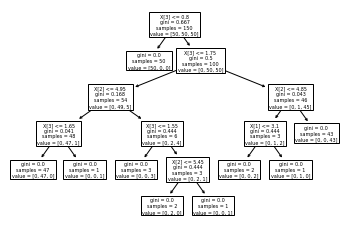

In [4]:
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

### 트리 : 정보 이득이 있어야 함 -> "불순도"
### 나눴는데 이전보다 더 안 좋으면 나눌 필요 X => 불순도가 낮아져야 나눌 의의(?)가 있음
### => {"gini" 계수, entropy} : 하이퍼파라미터를 이용해서 GridSearchCV 

## 의사결정트리를 만드는 이유 
   - 비교를 적게 하기 위해. : Binary Tree = 기준 수가 결정이 되면, 그걸 기준으로 나누어져서 자동으로 정렬이 됨. => 복잡한 걸 단순하게 만들 수 있음.
   - 데이터가 어떤 게 있고 어떤 걸 기준으로 해서 나뉘어졌는지 시각적으로 한 번에 파악할 수 있음.
   - if ) 깊이를 깊게 하면 : 나중에는 나누지 말아야하지 말 것까지 나눠버림 => 그래서 보통 5단계까지만 함
    
   - 가장 큰 단점 : 과적합(예방 방법=> max_depth 제한), 변수의 순서를 달리하면 결과도 달라짐
   
   - 끝단의 leaf : min_samples_split : 노드를 나누기 위한 최소 개수(default=2) : 하나씩 나눌 수 X
   - min_samples_leaf : 하나의 노드가 되기 위해 필요한 최소한의 수
   - hyper parameter(min_samples_leaf나 min_samples_split 같은 거) 조합을 만들어서 테스트 : GridSearchCV

In [5]:
cross_val_score(clf, iris.data, iris.target, cv=10) # cv=10 : 10개로 나눈다.
# 값들이 비슷함.

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [6]:
print(clf.get_n_leaves()) # 끝단 leaf의 개수   *자신 밑에 연결된 노드가 없는 노드

9


In [7]:
clf.get_depth() # 트리의 깊이 확인 : 5

5

In [8]:
clf.get_params() # 'criterion': 'gini' : 계수 = gini <- 지정하지 않았는데> => default 값

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [9]:
print(iris.data.shape) # 구조 확인 - 몇 행 몇 열인지.
print(iris.feature_names) # 열 이름 확인 - 이 4가지 값으로 꽃의 품종을 결정.

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
# 내부를 보고 싶으면 dataframe으로 변경!

import pandas as pd
data = pd.DataFrame(iris.data)
print(data.head())
clf.predict(data.iloc[1:150,:])

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB # 나이브베이즈
from sklearn.preprocessing import Binarizer # 경계값을 기준으로 0,1로 나눔
pipe = make_pipeline(Binarizer(), MultinomialNB) # 이름 없이 그냥 만듦.데이터가 들어오면 B를 처리하고 M에 넘겨줌

In [12]:
print(pipe.steps[0]) # 이름을 붙이지 않은 건 참조가 안되서 <- 이렇게 해야 함
print(pipe[0]) 

#pipe['reduce_dim']

('binarizer', Binarizer(copy=True, threshold=0.0))
Binarizer(copy=True, threshold=0.0)


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC #support vector classifier
from sklearn.decomposition import PCA # principle component analysis
estimators = [('reduce_dim', PCA()), ('clf', SVC())] # 이름을 줘도 되고 안 줘도 됨.
# PCA의 이름은 reduce_dim으로, SVC는 clf로 줌.
pipe = Pipeline(estimators)
pipe

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [14]:
print(pipe.steps[0]) # 리스트로 되어 있다고 보고, 이름(PCA)이 나오고
print(pipe[0]) # 얘는 model이 나옴

('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False))
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [15]:
# svc 값을 전달하고 싶어.. ?

pipe.set_params(clf__C=10) # ('clf', SVC())
# clf__C : svc가 이미 메모리를 차지하고 있기 때문에,,, 직접 볼 수 없다?? 

# 이름을 주는 이유는 ↑ 이렇게 매개변수를 전달하기 위해서

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [16]:
import numpy as np

# 데이터 생성

def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1) ** 2
    y = 10 -1. / (X.ravel() + 0.1 )
    if err >0 :
        y += err * rng.randn(N)
    return X, y

X,y = make_data(40)
print(type(X))

<class 'numpy.ndarray'>


In [17]:
# GridSearchCV
import numpy as np

from sklearn.model_selection import GridSearchCV # parameter tuning
from sklearn.preprocessing import PolynomialFeatures # 다차원 특성 축성(?) 추가
from sklearn.linear_model import LinearRegression

#파이프라인 리턴
def PolynomialRegression(degree=2, **kwargs): # dict 변동 매개변수
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


# model의 hyper parameter 조합
param_grid = {'polynomialfeatures__degree': np.arange(21), # 0 ~ 20 중 어떤 게 가장 좋은가 발견 - 21개
             'linearregression__fit_intercept':[True,False], # 절편이 있는가, 없는가? - 2개
             'linearregression__normalize':[True,False]} # 정규화를 할 건지 아닌지? - 2개 ** 21*2*2 => 총 84개의 조합

In [18]:
# cross Validation : 교차 검증
grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)
# 데이터를 7개로 나눠서(cv=7) 6개는 training, 1개는 test => 이걸 7번 반복

In [19]:
grid.fit(X, y); # 어떤 파라미터의 조합이 가장 좋은지 

C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
grid.best_params_ # 비선형회귀 => 4차일 때 가장 좋은 결과가 나왔다.

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [21]:
# 어떤 모델의 조합 가장 좋을까?
grid.best_estimator_

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [22]:
# 가장 적합한 모델 조합일 때의 best score
grid.best_score_

0.8956938691106144

In [23]:
np.linspace(-0.1,1.1,500)[:,None]
# 여기에 데이터가 있으면 행 번호를 붙이고, 열 번호는 없다. => 하나 출력되면 그 다음 줄에 출력 (옆으로 이어지지 X)

array([[-1.00000000e-01],
       [-9.75951904e-02],
       [-9.51903808e-02],
       [-9.27855711e-02],
       [-9.03807615e-02],
       [-8.79759519e-02],
       [-8.55711423e-02],
       [-8.31663327e-02],
       [-8.07615230e-02],
       [-7.83567134e-02],
       [-7.59519038e-02],
       [-7.35470942e-02],
       [-7.11422846e-02],
       [-6.87374749e-02],
       [-6.63326653e-02],
       [-6.39278557e-02],
       [-6.15230461e-02],
       [-5.91182365e-02],
       [-5.67134269e-02],
       [-5.43086172e-02],
       [-5.19038076e-02],
       [-4.94989980e-02],
       [-4.70941884e-02],
       [-4.46893788e-02],
       [-4.22845691e-02],
       [-3.98797595e-02],
       [-3.74749499e-02],
       [-3.50701403e-02],
       [-3.26653307e-02],
       [-3.02605210e-02],
       [-2.78557114e-02],
       [-2.54509018e-02],
       [-2.30460922e-02],
       [-2.06412826e-02],
       [-1.82364729e-02],
       [-1.58316633e-02],
       [-1.34268537e-02],
       [-1.10220441e-02],
       [-8.6

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

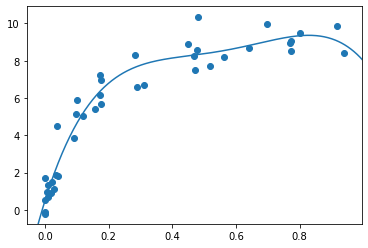

In [24]:
import matplotlib.pyplot as plt
model = grid.best_estimator_ # 제일 좋은 파라미터의 조합을 model

X_test = np.linspace(-0.1, 1.1, 500)[:,None] # 데이터를 옆으로 출력하지말고, 아래로 출력하라.

plt.scatter(X.ravel(), y) # ravel() : 데이터가 다차원으로 있더라도 1차원으로 만들어버림. : 평평하게 1차원으로 만듦.
lim = plt.axis()

# y의 test 값을 X test 데이터를 모델에 핏한 걸로..?
y_test = model.fit(X,y).predict(X_test)

plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

In [25]:
import numpy as np
import pandas as pd

dataset= [10,12,12,13,12,11,14,13,15,10,10,10,100,12,14,13, 12,10, 10,11,12,15,12,13,12,11,14,13,15,10,15,12,10,14,13,15,10] 
outliers=[]

def detect_outlier(data_1):
    threshold=3 # thresold (= 문지방)= 경계값
    mean_1 = np.mean(data_1) # 평균계산
    std_1 = np.std(data_1) # 표준편차
    
    for y in data_1: 
        z_score = (y-mean_1)/std_1  # z점수 : 표준편자의 몇 배수인지 알 수 있다.( 이유 : / std_1)
        # 3배수 => 99%
        
        if np.abs(z_score) > threshold: # 경계값(3)보다 크면(99% 이상이면)
            outliers.append(y)
            
    return outliers # 100 반환

outlier_datapoints = detect_outlier(dataset)
print(outlier_datapoints)

[100]


[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]


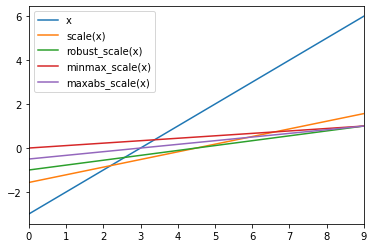

In [26]:
%matplotlib inline
import numpy as np
# scale : z점수
# robust_scale 평균 : median(위치적 중위수) / IQR
# maxabs_scale : -1 ~ 1까지
# minmax_scale : 0 ~ 1까지
# scale : -무한대 ~ 무한대

import pandas as pd
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

print( (np.arange(10, dtype=np.float) - 3) ) # 실수 타입으로 10개

x = (np.arange(10, dtype=np.float)-3).reshape(-1,1) # reshape(-1,1) : 하나 출력 후 한 줄 아래서 출력

# print(x)

df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                 columns=["x","scale(x)","robust_scale(x)","minmax_scale(x)","maxabs_scale(x)"])
df.plot()

<class 'sklearn.utils.Bunch'>
전처리전 평균: [5.84333333 3.05733333 3.758      1.19933333]
전처리전 std: [0.82530129 0.43441097 1.75940407 0.75969263]
전처리후 mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
전처리후 std: [1. 1. 1. 1.]


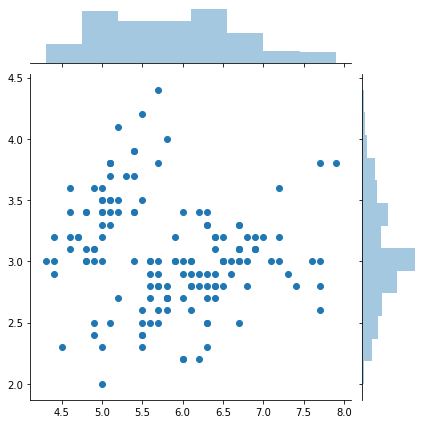

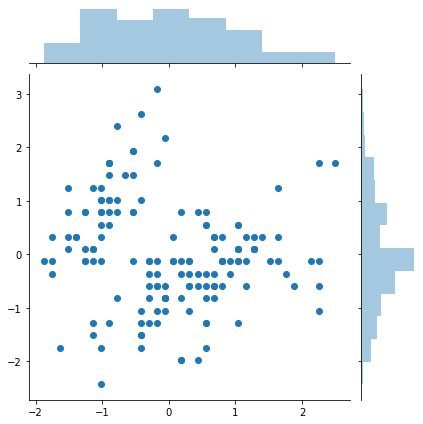

In [27]:
import seaborn as sns
from sklearn.datasets import load_iris
# 분포는 동일
# 그럼 정규화는 왜 하는 것? => 변수간 기여도를 동일하게 하기 위해서.

iris = load_iris()
print(type(iris)) # class 'sklearn.utils.Bunch'

data1 = iris.data # 원본 iris 데이터
data2 = scale(iris.data) # 전처리 후의 iris 데이터 : scale = (x-mean) / std

print("전처리전 평균:", np.mean(data1, axis=0))
print("전처리전 std:", np.std(data1, axis=0))
print("전처리후 mean:", np.mean(data2, axis=0))
print("전처리후 std:", np.std(data2, axis=0))
sns.jointplot(data1[:,0], data1[:,1]) # jointplot => 산포도와 막대그래프 2개가 나타나서 joint
plt.show()

sns.jointplot(data2[:,0], data2[:,1])
plt.show()

In [28]:
# scale() : 전처리 함수 => 이를 대신하는 게 standardScaler() = 클래스

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 인스턴스
scaler.fit(data1)
data2 = scaler.transform(data1) # transformer(변환기), model(logistic 이런거) = estimator(추정기)
# data2가 전처리가 됨
data1.std(), data2.std()

(1.9738430577598278, 1.0)

In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = np.array([[0],[1],[2]])

X
ohe.fit(X)

print(ohe.n_values, ohe.feature_indices_, ohe.active_features_)
ohe.categories_ # [array([0., 1., 2.])]

None [0 3] [0 1 2]


C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``feature_indices_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``active_features_`` attribute was deprecated in version 0.20 and will

[array([0., 1., 2.])]

In [30]:
print(ohe.transform(X).toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [31]:
X = np.array([[0,0,4],[1,1,0],[0,2,1],[1,0,2],[1,1,3]])
# 입력은 3자리(0,0,4)인데 10자리로 변경
# 1째자리 경우의 수 : 0,1 = 2가지
# 2째자리 경우의 수 : 0,1,2 = 3가지
# 3째자리 경우의 수 : 0,1,2,3,4 = 5가지 => 2+3+5 = 총 10가지


ohe.fit(X)
print(ohe.n_values, ohe.feature_indices_, ohe.active_features_) # 0, [0,2,5,10], [0,1,2,3,4,5,6,7,8,9]
#ohe.categories_ # [array([0., 1.]), array([0., 1., 2.]), array([0., 1., 2., 3., 4.])]

ohe.transform(X).toarray() # toarray()로 하니까 리스트로 보여줌

None [ 0  2  5 10] [0 1 2 3 4 5 6 7 8 9]


C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``feature_indices_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``active_features_`` attribute was deprecated in version 0.20 and will

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [32]:
# labeling code

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit([1,2,2,6])
le.classes_ # 중복되는 건 빼고 출력. 어차피 같은 값이니까.

array([1, 2, 6])

In [33]:
le.transform([1,1,2,6]) # 종류표를 만들어 놓고, 1이 0번째에 있으니까 0 <- 이런 식

array([0, 0, 1, 2], dtype=int64)

In [34]:
# inverse transform : transform 해 놓은 것으로 원본 데이터 찾기
le.inverse_transform([0,0,1,2])

array([1, 1, 2, 6])

In [35]:
# 다음 데이터를 인코딩하시오.
region = ["서울","서울","대전","부산"]

le.fit(region)
le.classes_

region2= le.transform(region) # 자동으로 오름차순 정렬이 되는구만,,.,
region2

array([2, 2, 0, 1], dtype=int64)

In [36]:
le.inverse_transform(region2)

array(['서울', '서울', '대전', '부산'], dtype='<U2')

he = OneHotEncoder()
he.fit([["서울"],["서울"],["부산"],["대전"]])

In [37]:
from sklearn.feature_extraction import DictVectorizer

v = DictVectorizer(sparse = False)
D = [{'foo':1, 'bar':2}, {'foo':3, 'baz':1}] # 입력데이터는 키:데이터 로 들어가 있는데,
X = v.fit_transform(D)

X # 출력은 숫자로 나옴
# D의 데이터는 3개 (foo, bar, baz -> 오름차순)m

#      'bar', 'baz', 'foo'
#        2      0      1      첫번째에서는 {'foo':1, 'bar':2} 에서 baz가 없으니까 0
#        0      1      3      두번째에서는 {'foo':3, 'baz':1}에서 bar가 없으니까 0

array([[2., 0., 1.],
       [0., 1., 3.]])

In [38]:
v.feature_names_

['bar', 'baz', 'foo']

In [39]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [40]:
# 결측치 처리
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy='mean') # NaN 값을 mean 값으로 대체하라.
imp_mean.fit([[7,2,3],[4, np.nan, 6],[10,5,9]]) # 이걸로 fit 해 놓았는데

X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]] # 이게 들어와 버림
# 3.5? => 2 + np.nan + 5 / 2(왜냐면 np.nan는 없는 거니까) => 3.5
# 
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [41]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [42]:
# [1,a,b,a^2,ab,b^2] => 비선형회귀 데이터

ploy = PolynomialFeatures(2) # 다항식(2차) 계산 결과값을 속성값으로 추가
ploy.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [43]:
# Ensemble(앙상블) 학습
# RandomForest : Decision Tree를 여러 개의 모델로 구축해서
# 연속형일 경우 -> 결과 값의 평균으로 예측
# 이산형일 경우 -> 결과 값의 투표를 통해서 결정

In [44]:
from sklearn.datasets import make_classification
X, y = make_classification(1000) # 1000개 1행.

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

# n_estimators=10 : DT를 10개 만들었다.

C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
# n_estimators=10일때의 정확도
print("Accuracy:\t", (y == rf.predict(X)).mean())

# 위에서 rf = RandomForestClassifier(n_estimators=30)로 지정하면 (n_estimators=30으로 지정하면) Accuracy = 1.0
# 파라미터를 지정하면서 .. 

Accuracy:	 0.993


Text(0.5, 1.0, 'feature_importance')

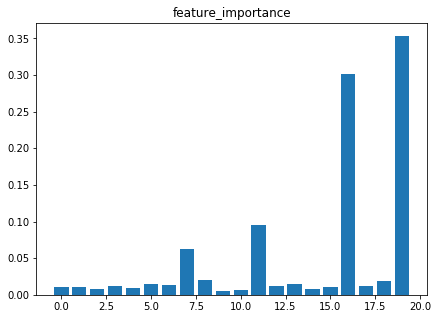

In [46]:
# 변수 중요도
f,ax = plt.subplots(figsize=(7,5))
ax.bar( range(0, len(rf.feature_importances_)) ,rf.feature_importances_ )
ax.set_title('feature_importance')

# 변수는 20개

In [47]:
print("특성수", rf.n_features_) # rf = rf = RandomForestClassifier()
print("모델", rf.estimators_)

특성수 20
모델 [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=277034769, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=497540318, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                      

In [48]:
# 문제) load_boston()을 이용하여 데이터를 로딩하고, rf로 변수 중요도를 출력해 보시오.
from sklearn.datasets import load_boston # 회귀 or 분류
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]

rf = RandomForestRegressor()
rf.fit(X,Y)

C:\Users\ICT01_07\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [49]:
print(sorted(zip(map(lambda x: round(x,2), rf.feature_importances_), names), reverse=True)) # 내림차순
# (변수 중요도, 변수이름) 출력. reverse=True : 내림차순

[(0.53, 'RM'), (0.29, 'LSTAT'), (0.07, 'DIS'), (0.03, 'NOX'), (0.02, 'CRIM'), (0.01, 'TAX'), (0.01, 'PTRATIO'), (0.01, 'INDUS'), (0.01, 'B'), (0.01, 'AGE'), (0.0, 'ZN'), (0.0, 'RAD'), (0.0, 'CHAS')]


Text(0.5, 1.0, 'feature importances')

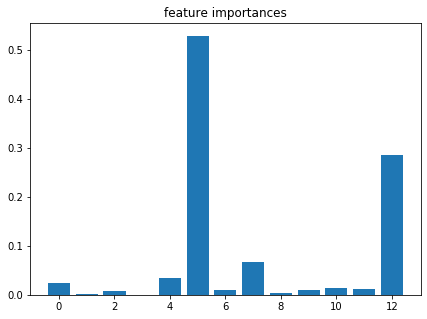

In [50]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7,5))
ax.bar(range(0, len(rf.feature_importances_)), rf.feature_importances_)
ax.set_title("feature importances")

In [51]:
# 평가 : 예측 - 상관계수, mse()
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_squared_error(Y, rf.predict(X))

2.3062784584980234

In [52]:
mean_absolute_error(Y, rf.predict(X))

0.9170553359683794

In [53]:
r2_score(Y, rf.predict(X))

0.9726807559348962

In [54]:
from sklearn.datasets import load_breast_cancer # 분류
from sklearn.model_selection import train_test_split # default - 0.75(X) vs 0.25(y)

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split( cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators = 100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [55]:
# predict 없음 => score

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train))) # 훈련용 데이터를 전용으로 하는..
print("테스트 세트 정확도:{:.3f}".format(forest.score(X_test, y_test))) # 테스트용 데이터

훈련 세트 정확도: 1.000
테스트 세트 정확도:0.972


In [56]:
from sklearn.tree import export_graphviz
export_graphviz(forest.estimators_[0], out_file="tree.dot", class_names=["악성","양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

# filled = 안에 채워지는 것. 아마도 색깔?
# impurity는 모르겠음

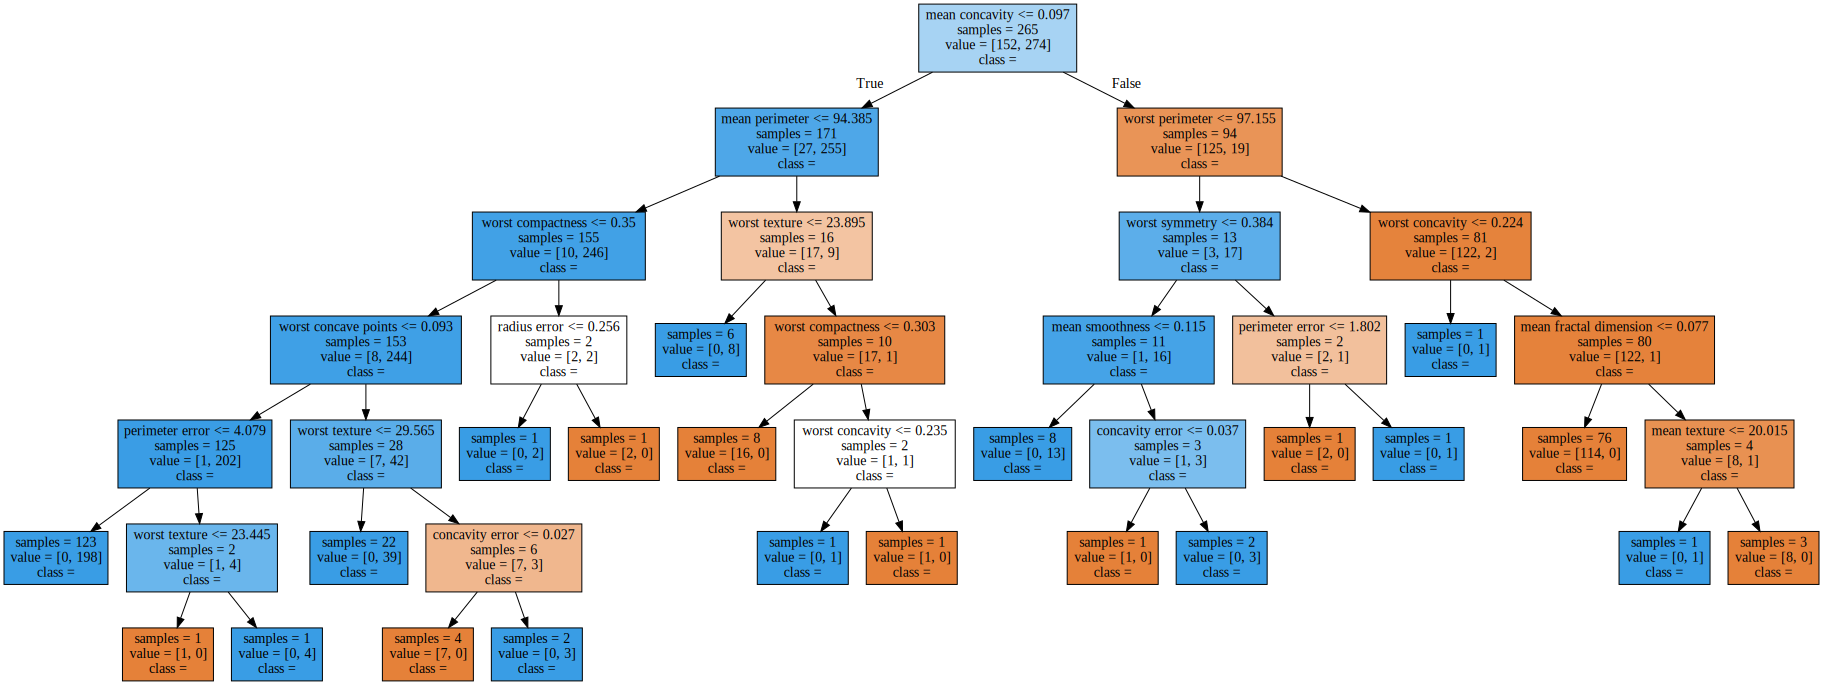

In [57]:
from IPython.display import display # 이미지 출력
import graphviz
with open("tree.dot", "rt", encoding='UTF-8') as f:
    dot_graph = f.read()

# 일반 파일로 open => 읽기용(read)으로 엶.

    
display(graphviz.Source(dot_graph))

In [58]:
# 실행 전에 Anaconda Prompt에서 conda install py-xgboost

import pandas as pd

boston = load_boston() # data(독립변수), target(종속변수), feature_names = 열 이름
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

print(data.head())
data['PRICE'] = boston.target # boston.target을 PRICE라는 하나의 데이터로 묶는다.
print(data.info())
data.describe()

import xgboost as xgb 
from sklearn.metrics import mean_squared_error # 평가하기 위해서 실행

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64


In [59]:
# 데이터프레임 = ndarray + dict(순서를 보장, 중복 허용)

X, y = data.iloc[:,:-1], data.iloc[:,-1] # 추가한 것(PRICE)이 -1(맨 뒤)에 있는 것 제거하고 X, y에 대입
data_dmatrix = xgb.DMatrix(data=X, label=y) # <<전용행렬>>   /////    label = 종속변수

C:\Users\ICT01_07\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ICT01_07\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [60]:
from sklearn.model_selection import train_test_split # 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

In [61]:
import numpy as np

xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                         max_depth = 5, alpha = 10, n_estimators = 10)

# objective = 'reg:linear' : 선형회귀방식
# colsample_bytree = 0.3 : 열 샘플 = 0.3%
# learning_rate = 0.1 : 경사하강법으로 인해 동작하는 것들.
# 경사하강법 -> optimization 최저점을 찾기 위해서.
# max_depth = 5 ; 깊어지면 과적합
# n_estimators = 10 : 10개를 만들어라

xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test) # ybar 예측치
rmse = np.sqrt(mean_squared_error(y_test, preds))
# np.sqrt를 넣어준 이유 : mse_ ~ = 제곱해서 평균값을 구한거니까 루트를 씌워야 원래 값으로 돌아오기 때문.
print("RMSE: %f" % (rmse)) # 10.4493

[17:12:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 10.449300


In [72]:
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 20] # 도화지 사이즈 결정
# rc가 붙어 있는 건 -> resource를 control 한다. 는 뜻의 파라미터
plt.show()

In [63]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [70]:
dataset = loadtxt('pima.data', delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
seed = 7
test_size = 0.33

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state=seed)
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


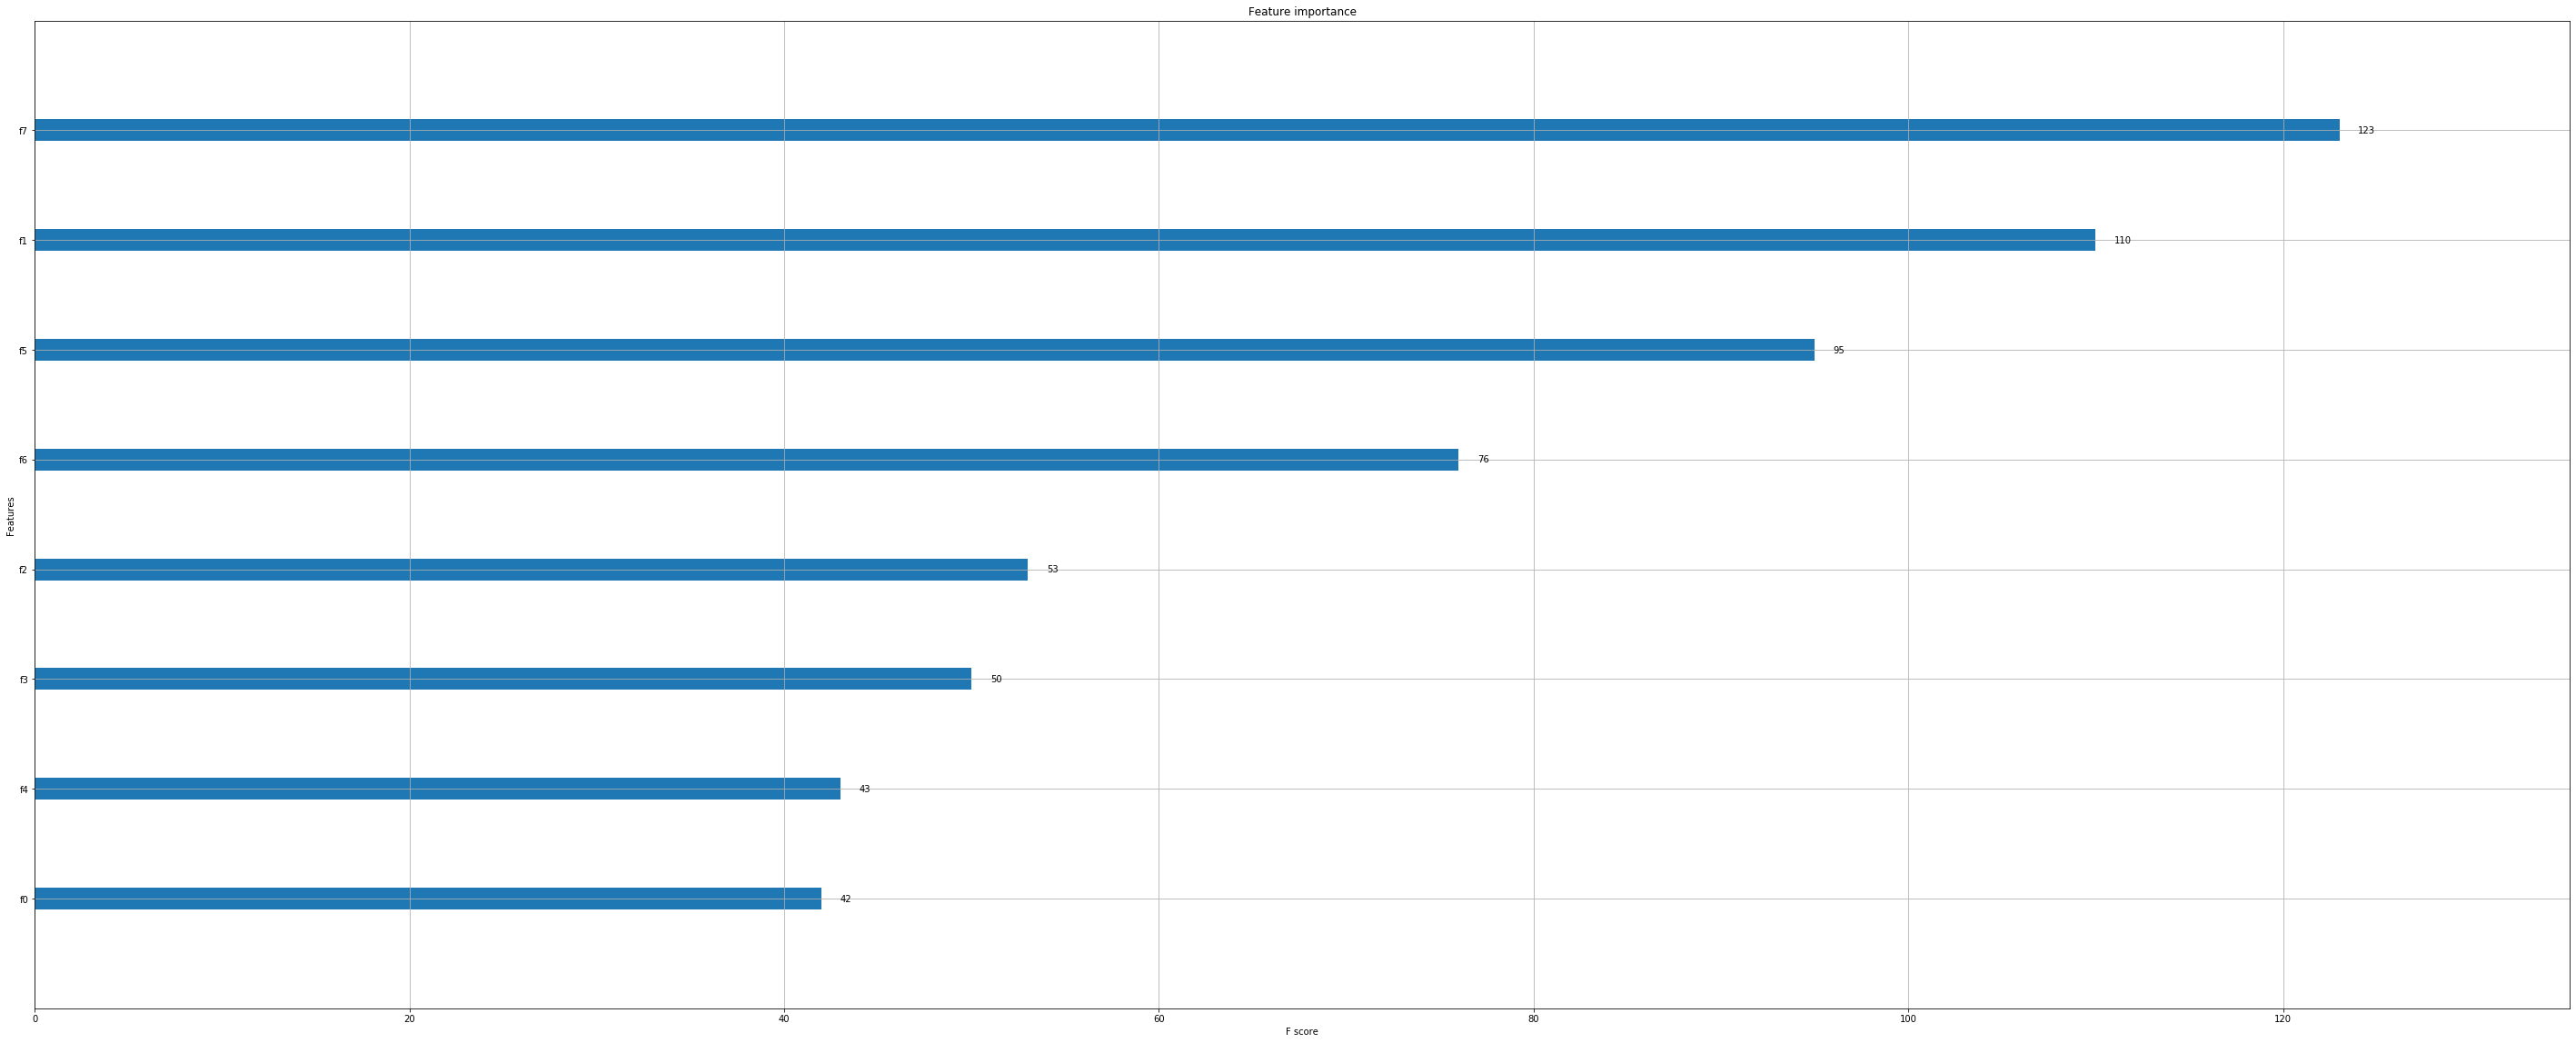

In [73]:
# 변수 중요도 찍기
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model)
pyplot.show()

In [74]:
# 예측
y_pred = model.predict(X_test)
print(y_pred)

[0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.]


In [75]:
accuracy = accuracy_score(y_test, y_pred)
print("정확도: %.2f%%" % (accuracy * 100.0))

정확도: 77.95%


In [77]:
# 변수 중요도를 이용해서 변수 선택
from sklearn.feature_selection import SelectFromModel

thresholds = np.sort(model.feature_importances_) # 중요도를 정렬(오름차순)해서 thresholds에 집어넣음. "경계선" 값으로 지정

In [81]:
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    
    select_X_train = selection.transform(X_train) # 경계선 이하의 중요성을 가진 변수 제거
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
    select_X_test = selection.transform(X_test) # 테스트용 데이터 변환
    y_pred = selection_model.predict(select_X_test)
    
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    
    
    
# Thresh=0.078, n=8, Accuracy: 77.95%
# Thresh=0.080, n=7, Accuracy: 76.38%
# Thresh=0.085, n=6, Accuracy: 77.56%
# Thresh=0.095, n=5, Accuracy: 76.38%
# Thresh=0.102, n=4, Accuracy: 76.38%
# Thresh=0.109, n=3, Accuracy: 74.80%
# Thresh=0.160, n=2, Accuracy: 75.98%
# Thresh=0.292, n=1, Accuracy: 70.08%

# 정확도가 제일 좋을 때는 n=8일 때임 => 모든 변수가 있어야 함.

Thresh=0.078, n=8, Accuracy: 77.95%
Thresh=0.080, n=7, Accuracy: 76.38%
Thresh=0.085, n=6, Accuracy: 77.56%
Thresh=0.095, n=5, Accuracy: 76.38%
Thresh=0.102, n=4, Accuracy: 76.38%
Thresh=0.109, n=3, Accuracy: 74.80%
Thresh=0.160, n=2, Accuracy: 75.98%
Thresh=0.292, n=1, Accuracy: 70.08%


In [83]:
import pickle # 메모리의 내용을 그대로 저장하는 패키지

pickle.dump(model, open("pima.pickle.dat", "wb"))  # 피클로 불러온 걸 dump에다가 씌움
loaded_model = pickle.load(open("pima.pickle.dat","rb"))
# read binary - 읽을 수 없음 /  rt : read text - 읽을 수 있음

y_pred = loaded_model.predict(X_test)

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy : %2f%%" % (accuracy * 100.0))

Accuracy : 77.952756%
